In [1]:
import numpy as np
!pip install --upgrade pandas-datareader
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_datareader as pdr 
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
# Function to compare SMA and buy/sell stocks
def compareSMA(data):
  # Initial pandas dataframe to keep track of when a signal to buy/sell is made and the amount of stock/money we have
  signals = pd.DataFrame(columns = ['date','signal','stock','money'])
  # Initial entry / Start with $100.000
  entry = {'date': 0, 'signal': 0, 'stock': 0, 'money': 100000}
  signals = signals.append(entry, ignore_index=True)
  # Signal boolean. False means we haven't bought stock
  boolean = False
  for date in data.to_dict('index'):
    row = data.loc[date]
    # Sell stock if condition
    if(boolean):
      if(row['SMA20']<row['SMA90']):
        boolean = False
        temp = signals.tail(1)
        temp = float(temp['stock'] * row['Open'] + temp['money'])
        entry = {'date': row.name, 'signal': 0, 'stock': 0, 'money': temp}
        signals = signals.append(entry, ignore_index = True)
    # Buy stocks if condition
    else:
      if(row['SMA20']>row['SMA90']):
        boolean = True
        temp = signals.tail(1)
        buyAmount = math.floor(temp['money'] / row['Close'])
        leftMoney = float(temp['money'] - buyAmount*row['Close'])
        entry = {'date': row.name, 'signal': 1, 'stock': buyAmount, 'money': leftMoney}
        signals = signals.append(entry, ignore_index=True)
  # Sell stock if we have stock by the end of the time range
  if(boolean):
    temp = signals.tail(1)
    row = data.tail(1)
    temp = float(temp['stock'] * row['Open'][0] + temp['money'])
    entry = {'date': row.index[0], 'signal': 0, 'stock': 0, 'money': temp}
    signals = signals.append(entry, ignore_index=True)
  return signals

In [3]:
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NVDA', 'AMD', 'INTC', 'META', 'JPM']

AAPL
                  date signal stock      money
0                    0      0     0     100000
1  2019-04-01 00:00:00      1  2091      29.29
2  2019-05-24 00:00:00      0     0   94228.84
3  2019-06-25 00:00:00      1  1927      17.81
4  2019-12-31 00:00:00      0     0  139686.77

MSFT
                  date signal stock     money
0                    0      0     0    100000
1  2019-04-01 00:00:00      1   840      23.2
2  2019-09-11 00:00:00      0     0  114187.6
3  2019-09-12 00:00:00      1   830      46.0
4  2019-12-31 00:00:00      0     0  130165.1

AMZN
                  date signal stock     money
0                    0      0     0    100000
1  2019-04-01 00:00:00      1  1102     37.58
2  2019-06-04 00:00:00      0     0   93663.5
3  2019-06-24 00:00:00      1   978     78.68
4  2019-08-09 00:00:00      0     0  89516.78
5  2019-11-07 00:00:00      1  1001     17.37
6  2019-11-20 00:00:00      0     0  87564.83
7  2019-12-09 00:00:00      1  1000     84.83
8  2019-12-

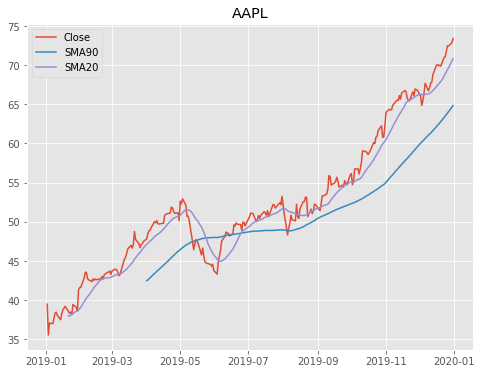

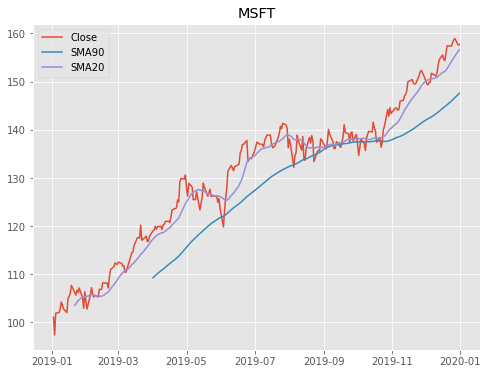

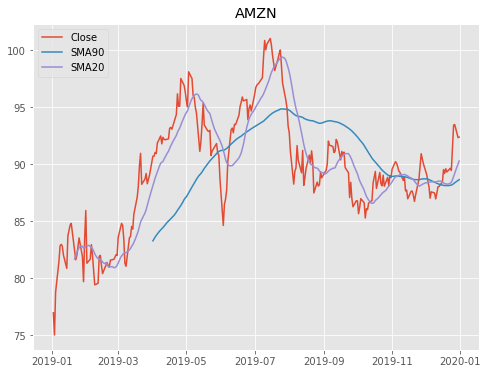

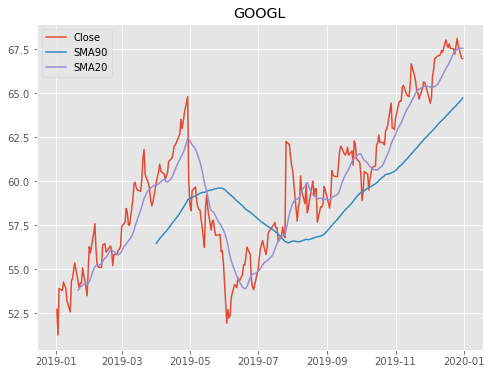

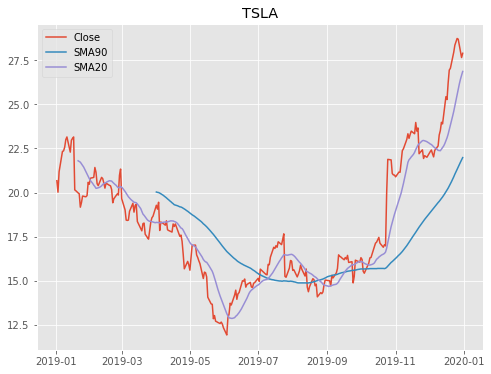

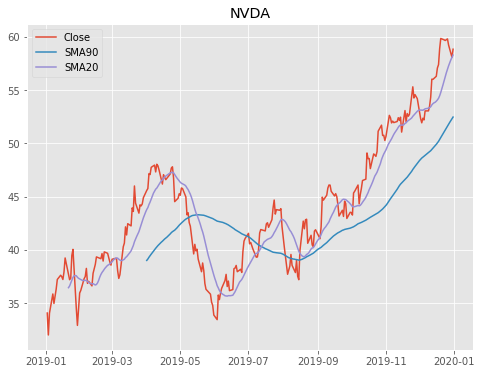

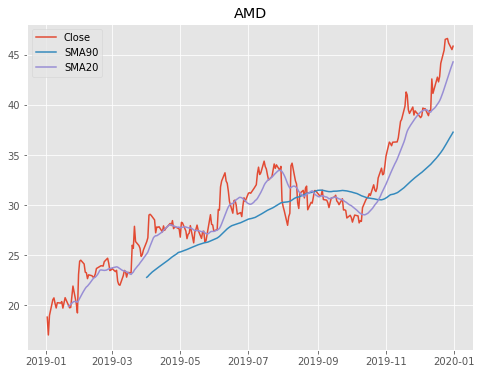

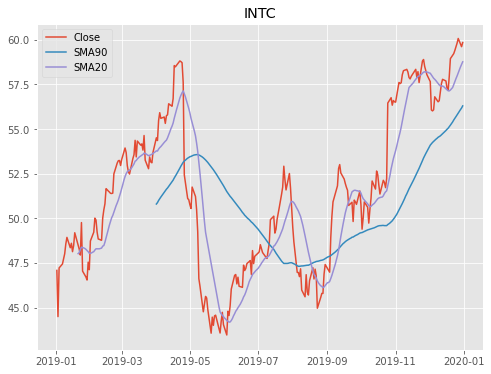

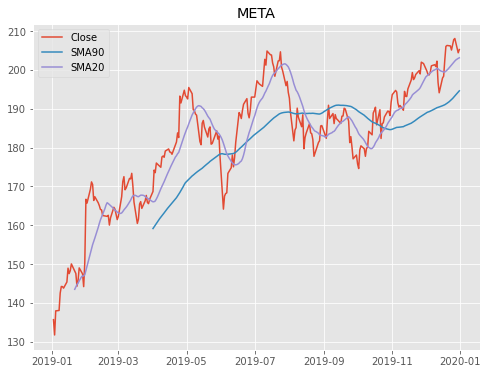

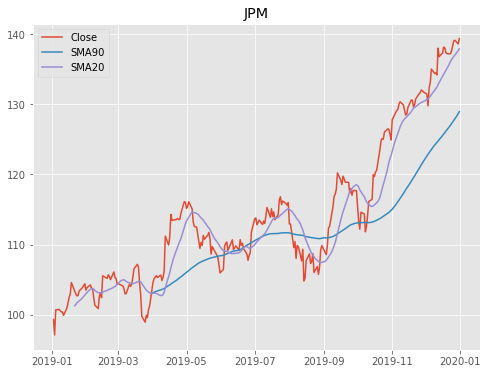

In [4]:
start_date = '20190101'
end_date = '20191231'
data = []
for x in stocks:
  timeDF = pdr.get_data_yahoo(x, start=start_date, end = end_date)
  timeDF.drop(['Adj Close','Volume','High','Low'], axis=1, inplace=True)
  timeDF = timeDF.resample('1D').mean().interpolate() # Fill missing days without affecting the data
  timeDF['SMA90'] = timeDF['Close'].rolling(window = 90).mean()
  timeDF['SMA20'] = timeDF['Close'].rolling(window = 20).mean()
  timeDF = round(timeDF, 2)
  data.append(timeDF)
  with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(timeDF['Close'], label='Close')
    plt.plot(timeDF['SMA90'], label='SMA90')
    plt.plot(timeDF['SMA20'], label='SMA20')
    plt.title(label = x)
    plt.legend(loc=2)
  print(x)  
  print(compareSMA(timeDF))
  print()

AAPL
                   date signal stock      money
0                     0      0     0     100000
1   2020-05-01 00:00:00      1  1383      50.59
2   2020-11-01 00:00:00      0     0  151848.67
3   2020-11-20 00:00:00      1  1294      10.71
4   2021-02-27 00:00:00      0     0  159146.83
5   2021-04-18 00:00:00      1  1182      37.81
6   2021-05-26 00:00:00      0     0  150104.53
7   2021-06-21 00:00:00      1  1134      76.33
8   2021-09-28 00:00:00      0     0  162521.83
9   2021-11-01 00:00:00      1  1091       6.47
10  2022-02-05 00:00:00      0     0  187734.84
11  2022-02-10 00:00:00      1  1090     124.04
12  2022-02-21 00:00:00      0     0  181271.14
13  2022-04-02 00:00:00      1  1031     134.75
14  2022-04-24 00:00:00      0     0  168084.65
15  2022-07-21 00:00:00      1  1081      151.3
16  2022-09-19 00:00:00      0     0  161555.41
17  2022-11-29 00:00:00      1  1144      56.93
18  2022-12-07 00:00:00      0     0  162722.29

MSFT
                   date signa

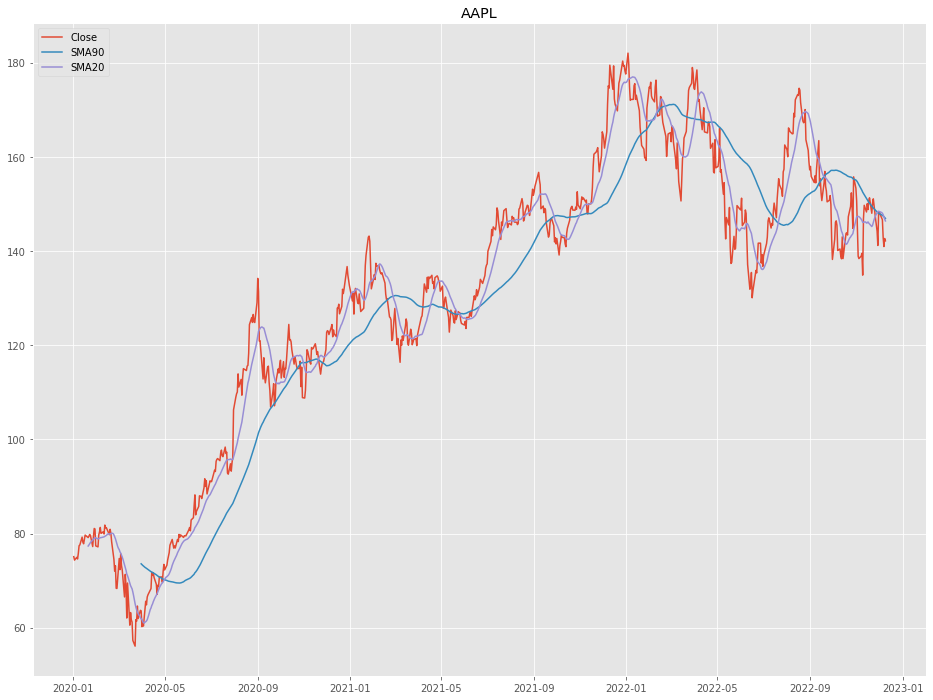

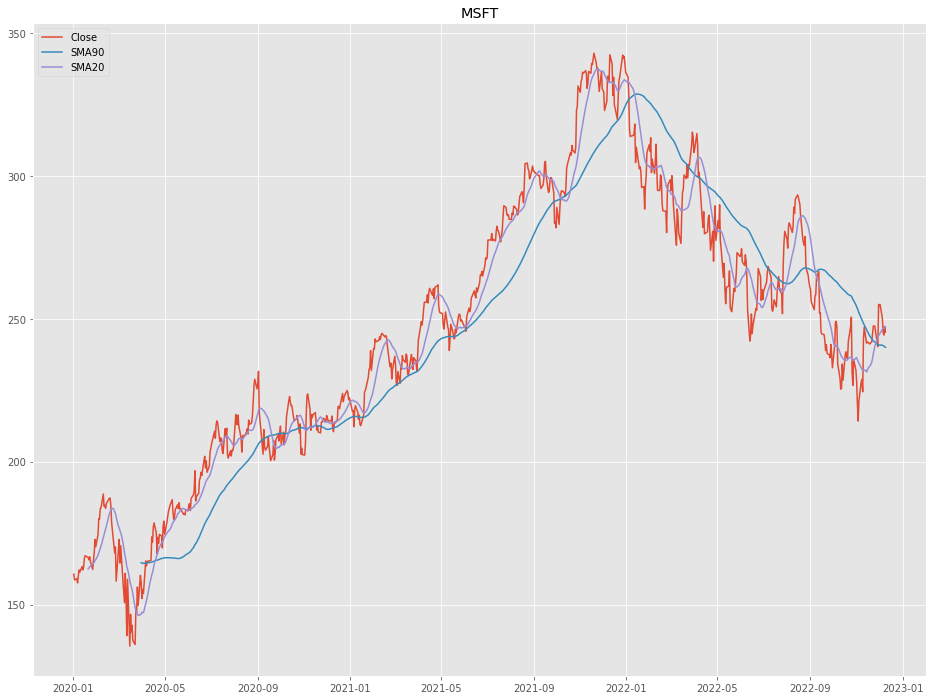

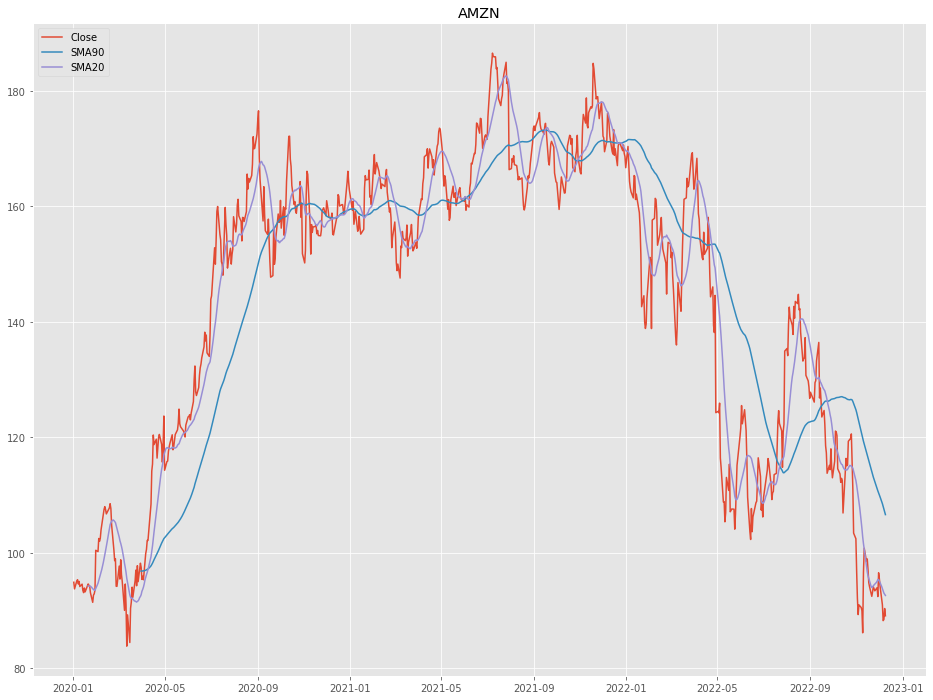

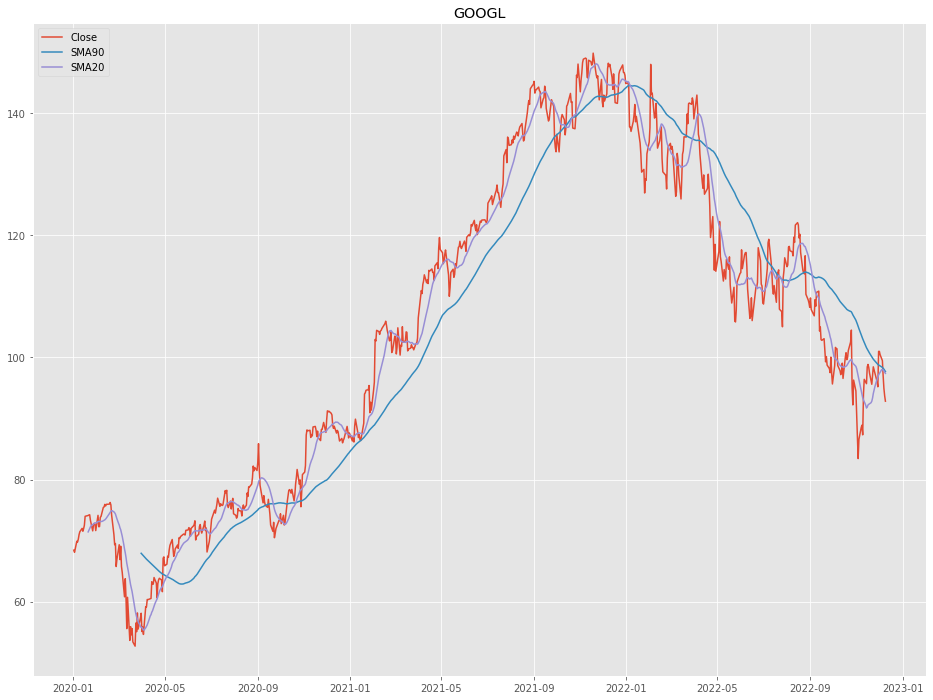

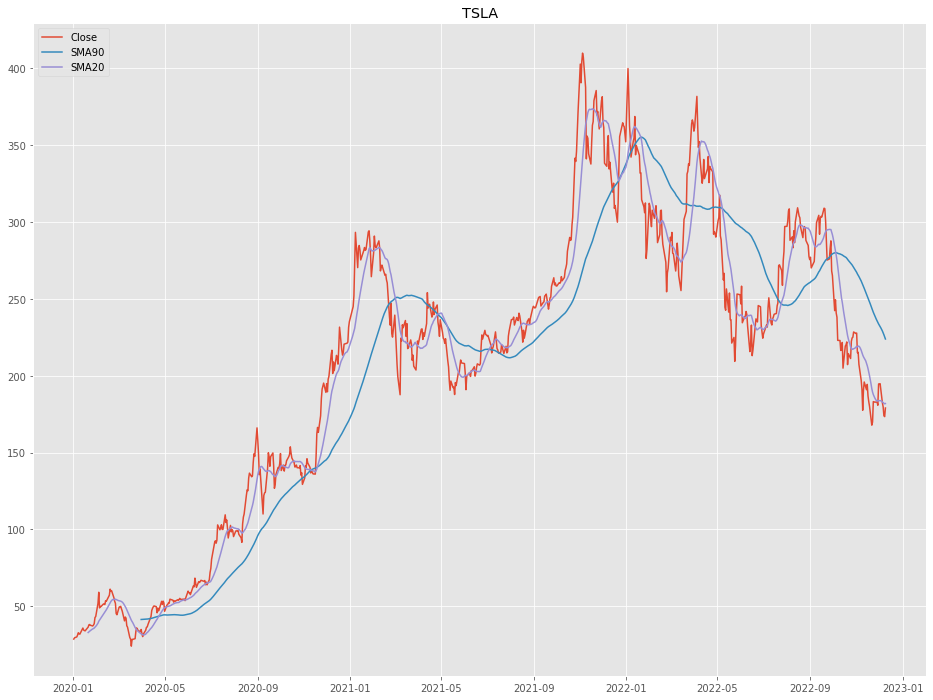

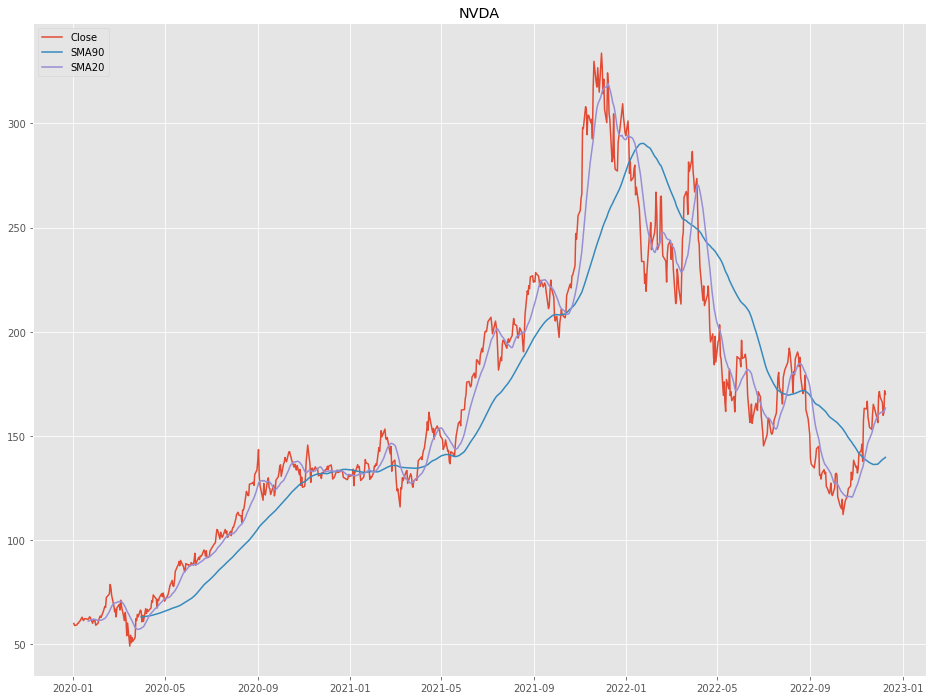

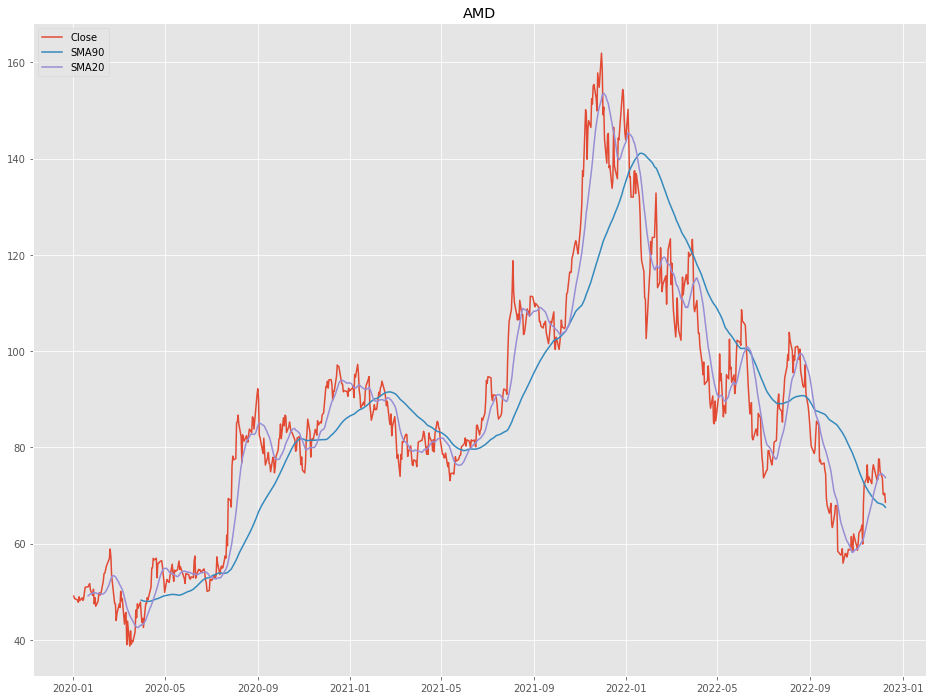

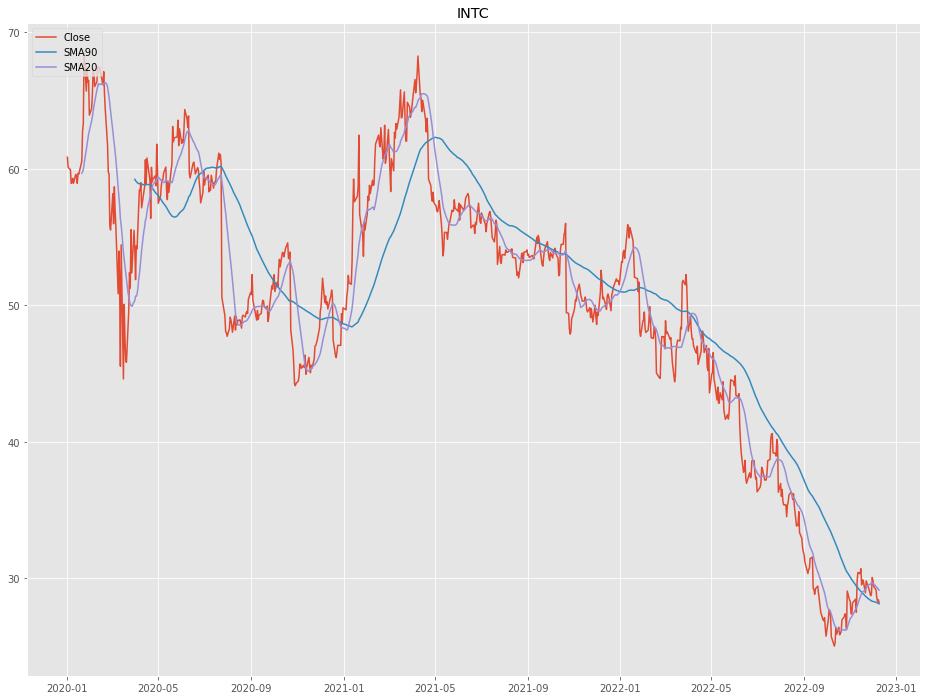

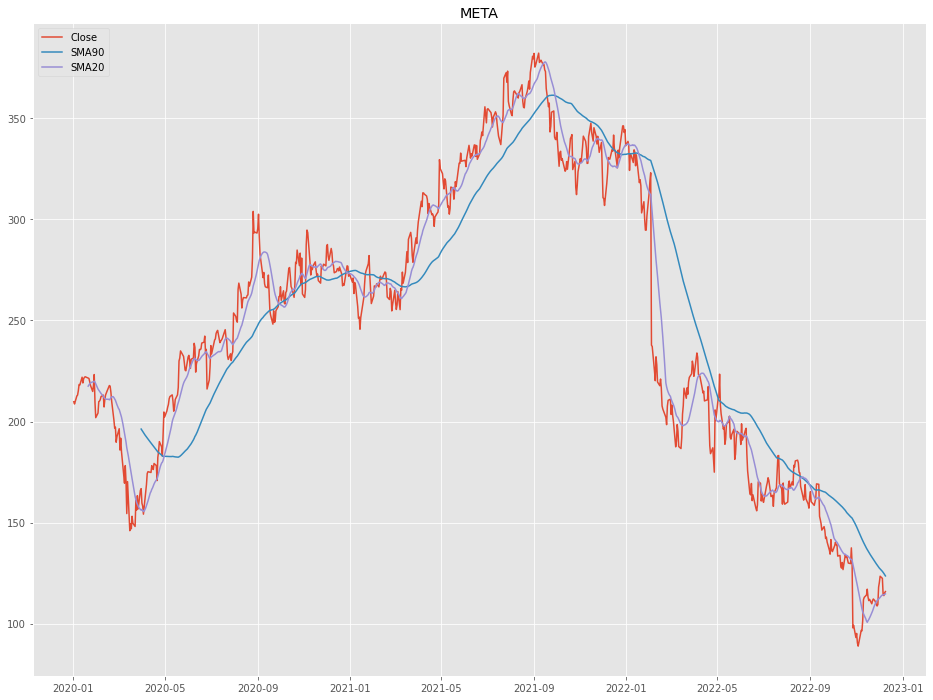

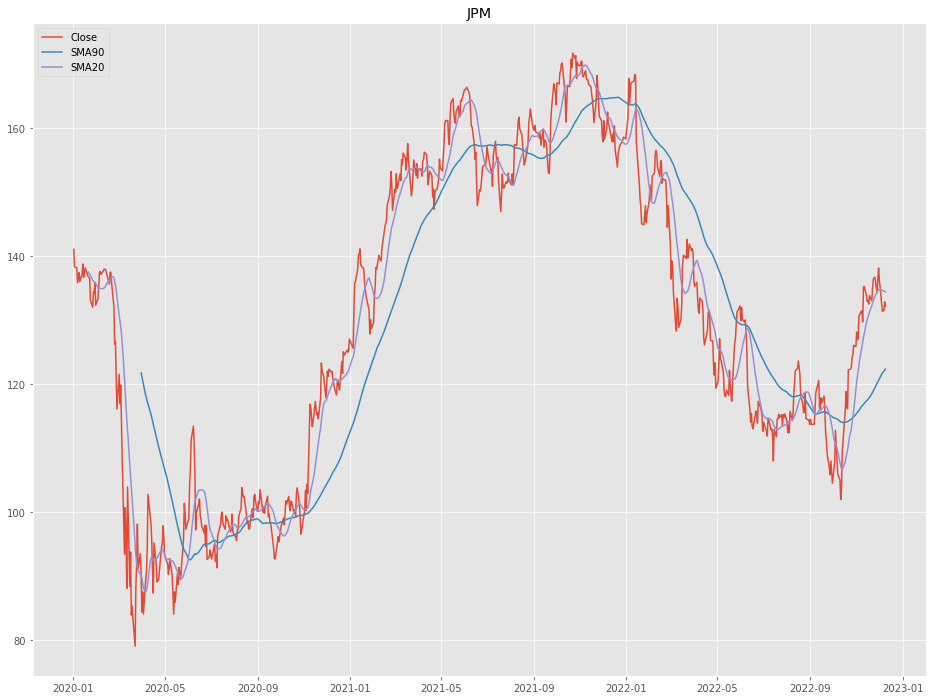

In [7]:
start_date = '20200101'
data = []
for x in stocks:
  timeDF = pdr.get_data_yahoo(x, start=start_date)
  timeDF.drop(['Adj Close','Volume','High','Low'], axis=1, inplace=True)
  timeDF = timeDF.resample('1D').mean().interpolate() # Fill missing days without affecting the data
  timeDF['SMA90'] = timeDF['Close'].rolling(window = 90).mean()
  timeDF['SMA20'] = timeDF['Close'].rolling(window = 20).mean()
  timeDF = round(timeDF, 2)
  data.append(timeDF)
  with plt.style.context('ggplot'):
    plt.figure(figsize=(16,12))
    plt.plot(timeDF['Close'], label='Close')
    plt.plot(timeDF['SMA90'], label='SMA90')
    plt.plot(timeDF['SMA20'], label='SMA20')
    plt.title(label = x)
    plt.legend(loc=2)
  print(x)  
  print(compareSMA(timeDF))
  print()